# **Travel Insurance Claim Prediction**

Predict if an insurance buyer will claim the insurance or not

Importing the required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the data with the help of pandas

In [ ]:
data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [ ]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [ ]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [ ]:
data['Distribution Channel'].nunique()

2

Rows and Columns

In [ ]:
print("Training dataset ",data.shape)
print("Test dataset ",test_data.shape)

Training dataset  (48260, 11)
Test dataset  (15832, 10)


Summary of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


Descriptive Statistics

In [ ]:
data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


To check the null value

In [ ]:
data.isna().any()

Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                   True
Age                     False
Claim                   False
dtype: bool

In [ ]:
test_data.isna().any()

Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                   True
Age                     False
dtype: bool

In [ ]:
data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [ ]:
data.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age', 'Claim'],
      dtype='object')

In [ ]:
for i in data.columns:
  print(data[i].nunique())

16
2
2
26
442
141
1005
922
2
88
2


In [ ]:
'''data.drop(['Distribution Channel','Destination','Agency Type'],axis=1,inplace=True)
test_data.drop(['Distribution Channel','Destination','Agency Type'],axis=1,inplace=True)'''

"data.drop(['Distribution Channel','Destination','Agency Type'],axis=1,inplace=True)\ntest_data.drop(['Distribution Channel','Destination','Agency Type'],axis=1,inplace=True)"

Handling the missing values

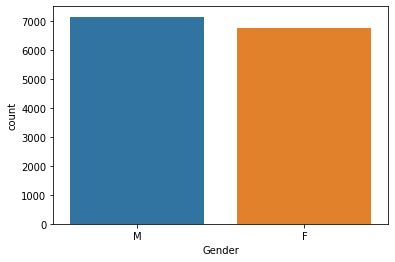

In [ ]:
sns.countplot(x='Gender',data=data)

In [ ]:
data['Gender'].fillna('M',inplace=True)
test_data['Gender'].fillna('M',inplace=True)

Removing Duplicate Values

In [ ]:
data=data.drop_duplicates(keep='first')

In [ ]:
data.shape

(42348, 11)

Label Encoding

Training Data

In [ ]:
cat_features=[x for x in data.columns if data[x].dtype=="object"]
print(cat_features)

['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Gender']


In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder

for i in cat_features:
    labelencoder = LabelEncoder()
    data[i] = labelencoder.fit_transform(data[i].astype(str))

In [ ]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,6,1,1,16,61,131,19.8,11.88,1,29,0
1,7,1,1,10,93,90,63.0,0.00,1,36,0
2,7,1,1,1,22,132,22.0,0.00,1,25,0
3,2,0,1,17,14,112,54.5,13.63,1,24,0
4,7,1,1,10,90,137,10.0,0.00,1,23,0


Test Data

In [ ]:
cat_features_test=[x for x in test_data.columns if test_data[x].dtype=="object"]
print(cat_features_test)

['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Gender']


In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder

for i in cat_features_test:
    labelencoder = LabelEncoder()
    test_data[i] = labelencoder.fit_transform(test_data[i].astype(str))

In [ ]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,7,1,1,10,24,38,27.0,0.0,1,36
1,7,1,1,10,51,48,45.0,0.0,1,36
2,7,1,1,10,52,48,21.0,0.0,1,21
3,7,1,1,10,89,92,11.0,0.0,1,30
4,7,1,1,10,5,61,10.0,0.0,1,33


To know the inshits of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe896323390>,
      dtype=object)

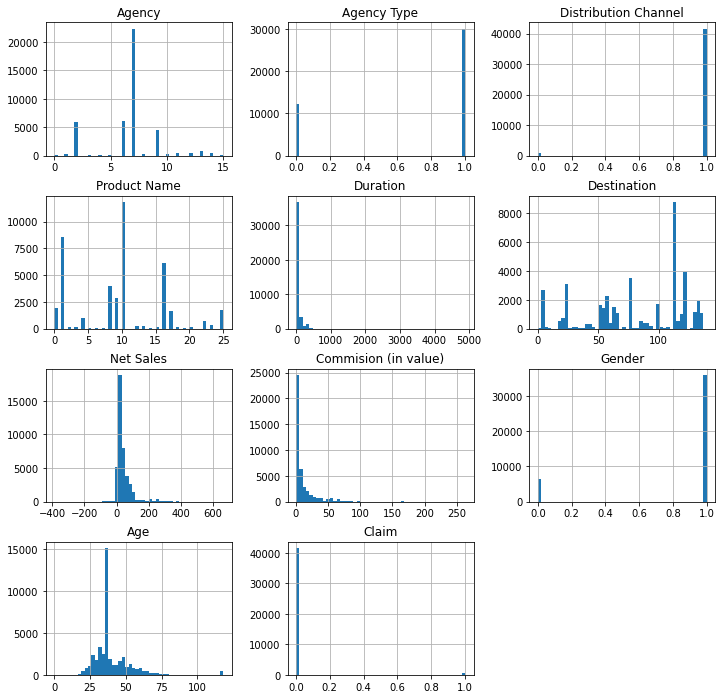

In [ ]:
#Training Data
data.hist(bins=50, figsize=(12,12))

In [ ]:
data.isna().any()

Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                  False
Age                     False
Claim                   False
dtype: bool

Handling the Outlier

In [ ]:
data.describe()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
count,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000
mean,6.627373,0.709431,0.981392,9.467295,52.615637,81.826344,42.591850,10.556996,0.849462,39.885071,0.016341
std,2.442915,0.454030,0.135137,6.603116,109.480986,39.899000,50.165176,20.453626,0.357603,13.464355,0.126784
min,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-389.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,1.000000,2.000000,11.000000,55.000000,19.000000,0.000000,1.000000,34.000000,0.000000
50%,7.000000,1.000000,1.000000,10.000000,25.000000,89.000000,29.000000,0.000000,1.000000,36.000000,0.000000
75%,7.000000,1.000000,1.000000,16.000000,57.000000,112.000000,50.000000,11.880000,1.000000,44.000000,0.000000
max,15.000000,1.000000,1.000000,25.000000,4881.000000,140.000000,666.000000,262.760000,1.000000,118.000000,1.000000


In [ ]:
features=['Agency','Duration','Net Sales','Commision (in value)','Age']

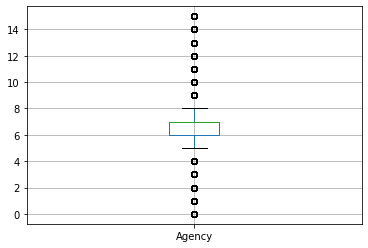

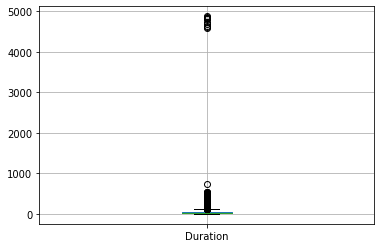

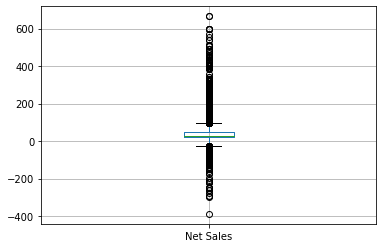

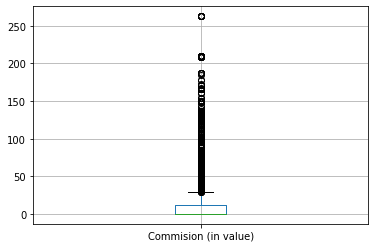

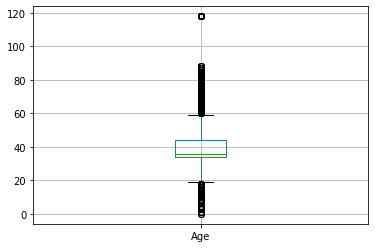

In [ ]:
for i in features:
    if i=='Claim':
        continue
    data.boxplot(column=i)
    plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    low_range=q1-(1.5*iqr)
    upp_range=q3+(1.5*iqr)
    return low_range,upp_range

In [ ]:
#Training Data
for i in features:
  low,upp=remove_outlier(data[i])
  data[i]=np.where(data[i]>upp,upp,data[i])
  data[i]=np.where(data[i]<low,low,data[i])

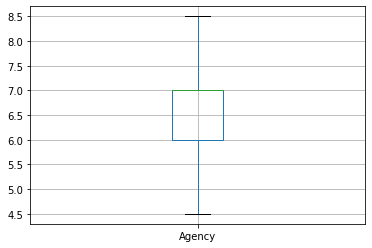

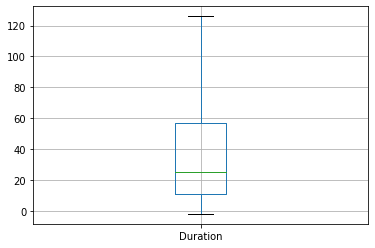

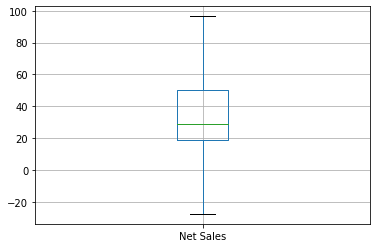

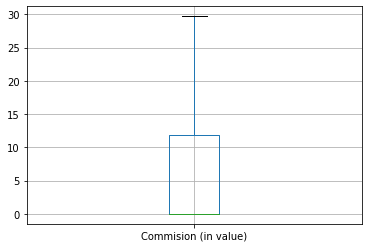

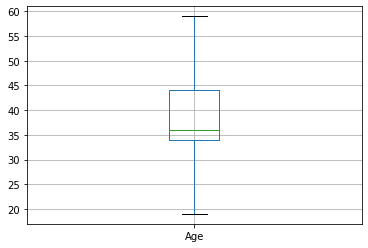

In [ ]:
for i in features:
    if i=='Claim':
        continue
    data.boxplot(column=i)
    plt.show()

In [ ]:
#Test Data
for i in features:
  low,upp=remove_outlier(test_data[i])
  test_data[i]=np.where(test_data[i]>upp,upp,test_data[i])
  test_data[i]=np.where(test_data[i]<low,low,test_data[i])

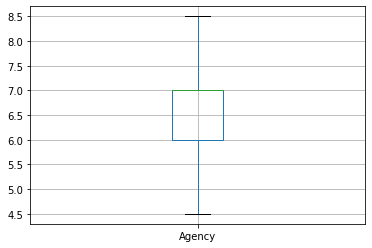

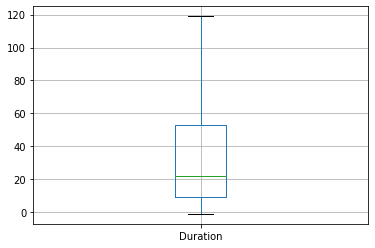

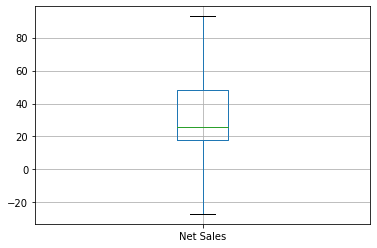

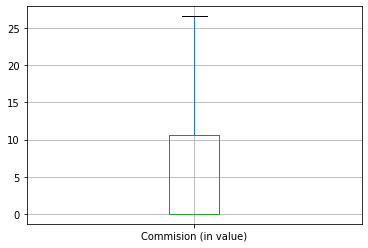

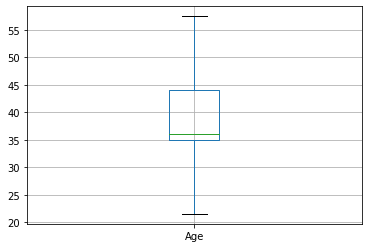

In [ ]:
for i in features:
    if i=='Claim':
        continue
    test_data.boxplot(column=i)
    plt.show()

In [ ]:
data.describe()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
count,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000,42348.000000
mean,6.731924,0.709431,0.981392,9.467295,39.830311,81.826344,36.942282,7.508919,0.849462,38.800746,0.016341
std,1.186073,0.454030,0.135137,6.603116,38.103109,39.899000,27.741491,10.395382,0.357603,9.554203,0.126784
min,4.500000,0.000000,0.000000,0.000000,-2.000000,0.000000,-27.500000,0.000000,0.000000,19.000000,0.000000
25%,6.000000,0.000000,1.000000,2.000000,11.000000,55.000000,19.000000,0.000000,1.000000,34.000000,0.000000
50%,7.000000,1.000000,1.000000,10.000000,25.000000,89.000000,29.000000,0.000000,1.000000,36.000000,0.000000
75%,7.000000,1.000000,1.000000,16.000000,57.000000,112.000000,50.000000,11.880000,1.000000,44.000000,0.000000
max,8.500000,1.000000,1.000000,25.000000,126.000000,140.000000,96.500000,29.700000,1.000000,59.000000,1.000000


In [ ]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,7.0,1,1,10,24.0,38,27.0,0.0,1,36.0
1,7.0,1,1,10,51.0,48,45.0,0.0,1,36.0
2,7.0,1,1,10,52.0,48,21.0,0.0,1,21.5
3,7.0,1,1,10,89.0,92,11.0,0.0,1,30.0
4,7.0,1,1,10,5.0,61,10.0,0.0,1,33.0


In [ ]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,6.0,1,1,16,61.0,131,19.8,11.88,1,29.0,0
1,7.0,1,1,10,93.0,90,63.0,0.00,1,36.0,0
2,7.0,1,1,1,22.0,132,22.0,0.00,1,25.0,0
3,4.5,0,1,17,14.0,112,54.5,13.63,1,24.0,0
4,7.0,1,1,10,90.0,137,10.0,0.00,1,23.0,0


Imbalance data

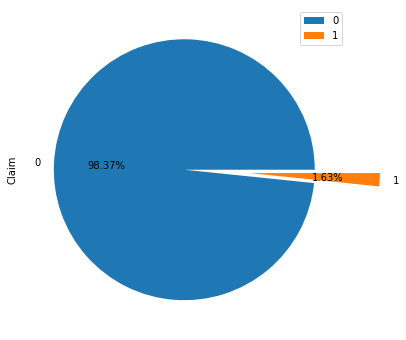

In [ ]:
data["Claim"].value_counts().plot(kind="pie",explode=[0,0.5],figsize=(6,6),autopct="%1.2f%%")
plt.legend(["0","1"])
plt.show()

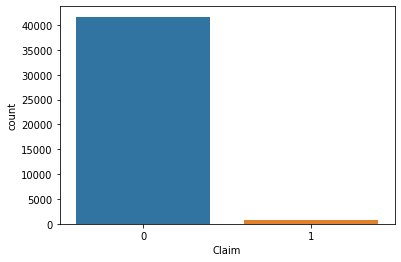

In [ ]:
sns.countplot(x='Claim',data=data)

Handling the imbalance data using random values -Oversample




In [ ]:
from sklearn.utils import resample

df_majority = data[data['Claim']==0]
df_minority = data[data['Claim']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=41656,    # to match majority class
                                 random_state=123)
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
data['Claim'].value_counts()

1    41656
0    41656
Name: Claim, dtype: int64

In [ ]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,6.0,1,1,16,61.0,131,19.8,11.88,1,29.0,0
1,7.0,1,1,10,93.0,90,63.0,0.00,1,36.0,0
2,7.0,1,1,1,22.0,132,22.0,0.00,1,25.0,0
3,4.5,0,1,17,14.0,112,54.5,13.63,1,24.0,0
4,7.0,1,1,10,90.0,137,10.0,0.00,1,23.0,0


In [ ]:
data.shape

(83312, 11)

In [ ]:
x_train=data.iloc[:,0:10]
y_train=data.iloc[:,10]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(bootstrap=True, max_depth=3,criterion='gini',min_samples_leaf=3,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
X_test=test_data.values

In [ ]:
y_pred=model.predict(X_test)

Submission

In [ ]:
submission = pd.DataFrame({
        "prediction": y_pred
    })
submission.to_csv('submission_final.csv', index=False)

In [ ]:
submission

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
15827,0
15828,1
15829,0
15830,0
